In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
!ls homework

apply_demo.csv     demo_duplicate.csv movie_metadata.csv
city_weather.csv   iris.csv           sales-funnel.xlsx


In [3]:
link = 'https://projects.fivethirtyeight.com/flights/'

In [4]:
df = pd.read_csv('homework/usa_flights.csv')

In [5]:
df.shape

(201664, 14)

In [6]:
df.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
0,02/01/2015 0:00,AA,1,JFK,LAX,-19.0,0,2475,NaN,NaN,NaN,NaN,NaN,381.0
1,03/01/2015 0:00,AA,1,JFK,LAX,-39.0,0,2475,NaN,NaN,NaN,NaN,NaN,358.0
2,04/01/2015 0:00,AA,1,JFK,LAX,-12.0,0,2475,NaN,NaN,NaN,NaN,NaN,385.0
3,05/01/2015 0:00,AA,1,JFK,LAX,-8.0,0,2475,NaN,NaN,NaN,NaN,NaN,389.0
4,06/01/2015 0:00,AA,1,JFK,LAX,25.0,0,2475,0.0,0.0,0.0,25.0,0.0,424.0


In [7]:
df.tail()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
201659,10/01/2015 0:00,NK,188,OAK,LAS,-16.0,0,407,NaN,NaN,NaN,NaN,NaN,77.0
201660,11/01/2015 0:00,NK,188,OAK,LAS,-4.0,0,407,NaN,NaN,NaN,NaN,NaN,87.0
201661,12/01/2015 0:00,NK,188,OAK,LAS,-7.0,0,407,NaN,NaN,NaN,NaN,NaN,82.0
201662,13/01/2015 0:00,NK,188,OAK,LAS,23.0,0,407,3.0,0.0,0.0,20.0,0.0,103.0
201663,14/01/2015 0:00,NK,188,OAK,LAS,-7.0,0,407,NaN,NaN,NaN,NaN,NaN,82.0


# 1.获取延误时间的top10

In [9]:
df.sort_values('arr_delay', ascending=False)[:10]

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
11073,11/01/2015 0:00,AA,1595,AUS,DFW,1444.0,0,190,1444.0,0.0,0.0,0.0,0.0,59.0
10214,13/01/2015 0:00,AA,1487,OMA,DFW,1392.0,0,583,1392.0,0.0,0.0,0.0,0.0,117.0
12430,03/01/2015 0:00,AA,1677,MEM,DFW,1384.0,0,432,1380.0,0.0,0.0,4.0,0.0,104.0
8443,04/01/2015 0:00,AA,1279,OMA,DFW,1237.0,0,583,1222.0,0.0,15.0,0.0,0.0,102.0
10328,05/01/2015 0:00,AA,1495,EGE,DFW,1187.0,0,721,1019.0,0.0,168.0,0.0,0.0,127.0
36570,04/01/2015 0:00,DL,1435,MIA,MSP,1174.0,0,1501,1174.0,0.0,0.0,0.0,0.0,231.0
36495,04/01/2015 0:00,DL,1367,ROC,ATL,1138.0,0,749,1112.0,0.0,0.0,26.0,0.0,171.0
59072,14/01/2015 0:00,DL,1687,SAN,MSP,1084.0,0,1532,1070.0,0.0,0.0,14.0,0.0,240.0
32173,05/01/2015 0:00,AA,970,LAS,LAX,1042.0,0,236,1033.0,0.0,9.0,0.0,0.0,66.0
56488,12/01/2015 0:00,DL,2117,ATL,COS,1016.0,0,1184,1016.0,0.0,0.0,0.0,0.0,193.0


# 2. 计算延误和没有延误所占比例

In [10]:
df['cancelled'].value_counts()

0    196873
1      4791
Name: cancelled, dtype: int64

In [11]:
df['delayed'] = df['arr_delay'].apply(lambda x: x>0)

In [12]:
df.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time,delayed
0,02/01/2015 0:00,AA,1,JFK,LAX,-19.0,0,2475,NaN,NaN,NaN,NaN,NaN,381.0,False
1,03/01/2015 0:00,AA,1,JFK,LAX,-39.0,0,2475,NaN,NaN,NaN,NaN,NaN,358.0,False
2,04/01/2015 0:00,AA,1,JFK,LAX,-12.0,0,2475,NaN,NaN,NaN,NaN,NaN,385.0,False
3,05/01/2015 0:00,AA,1,JFK,LAX,-8.0,0,2475,NaN,NaN,NaN,NaN,NaN,389.0,False
4,06/01/2015 0:00,AA,1,JFK,LAX,25.0,0,2475,0.0,0.0,0.0,25.0,0.0,424.0,True


In [13]:
df['delayed'].value_counts()

False    103037
True      98627
Name: delayed, dtype: int64

In [15]:
delay_data = df['delayed'].value_counts()

In [16]:
delay_data

False    103037
True      98627
Name: delayed, dtype: int64

In [18]:
# 延误的比率
delay_data[1]/(delay_data[0]+delay_data[1])

0.4890659711202793

# 3. 每个航空公司的延误情况

In [22]:
delay_group = df.groupby(['unique_carrier', 'delayed'])

In [23]:
delay_group

In [24]:
delay_group.size()

unique_carrier  delayed
AA              False       8912
                True        9841
AS              False       3527
                True        2104
B6              False       4832
                True        4401
DL              False      17719
                True        9803
EV              False      10596
                True       11371
F9              False       1103
                True        1848
HA              False       1351
                True        1354
MQ              False       4692
                True        8060
NK              False       1550
                True        2133
OO              False       9977
                True       10804
UA              False       7885
                True        8624
US              False       7850
                True        6353
VX              False       1254
                True         781
WN              False      21789
                True       21150
dtype: int64

In [28]:
# 多级的series转化为dataframe
df_delay = delay_group.size().unstack()

In [29]:
df_delay

delayed,False,True
unique_carrier,,
AA,8912,9841
AS,3527,2104
B6,4832,4401
DL,17719,9803
EV,10596,11371
F9,1103,1848
HA,1351,1354
MQ,4692,8060
NK,1550,2133


In [30]:
type(df_delay)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='unique_carrier'>

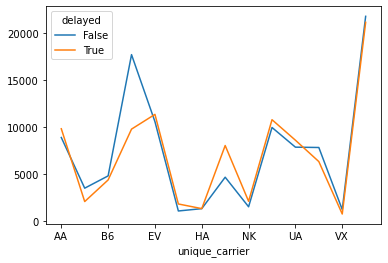

In [32]:
df_delay.plot()

<AxesSubplot:ylabel='unique_carrier'>

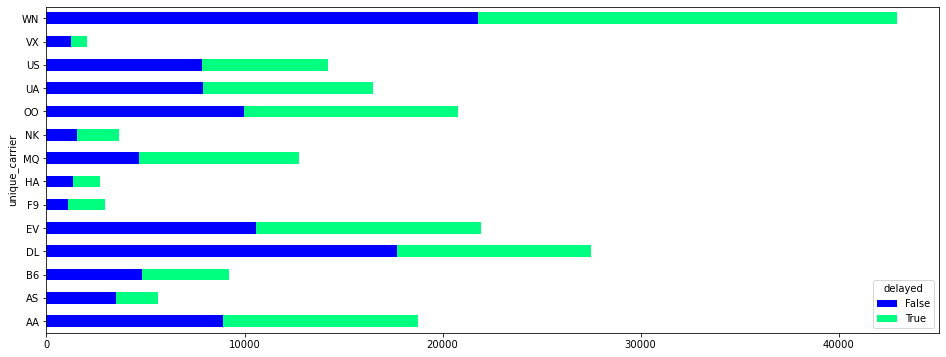

In [34]:
df_delay.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

In [48]:
df_delay['rate'] = df_delay[0]/(df_delay[1]+df_delay[0])

In [49]:
df_delay

delayed,False,True,rate
unique_carrier,,,
AA,8912,9841,0.475231
AS,3527,2104,0.626354
B6,4832,4401,0.523340
DL,17719,9803,0.643812
EV,10596,11371,0.482360
F9,1103,1848,0.373772
HA,1351,1354,0.499445
MQ,4692,8060,0.367942
NK,1550,2133,0.420853


<AxesSubplot:xlabel='unique_carrier'>

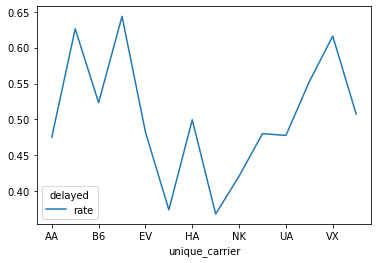

In [50]:
df_delay[['rate']].plot()

In [73]:
flight_by_carrier = df.pivot_table(index='flight_date', columns="unique_carrier", values='flight_num', aggfunc='count' )

In [74]:
flight_by_carrier

unique_carrier,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
flight_date,,,,,,,,,,,,,,
02/01/2015 0:00,1545,477,759,2271,1824,254,224,1046,287,1763,1420,1177,176,3518
03/01/2015 0:00,1453,449,711,2031,1744,192,202,937,285,1681,1233,1028,160,3328
04/01/2015 0:00,1534,458,759,2258,1833,249,206,1027,284,1731,1283,1158,169,3403
05/01/2015 0:00,1532,433,754,2212,1811,264,209,1039,288,1737,1432,1157,174,3506
06/01/2015 0:00,1400,415,692,2054,1686,249,202,966,279,1527,1294,1003,152,3396
07/01/2015 0:00,1420,419,694,2107,1705,228,208,998,284,1557,1259,1143,151,3398
08/01/2015 0:00,1447,444,731,2214,1759,224,208,1009,284,1625,1331,1171,164,3398
09/01/2015 0:00,1448,447,730,2204,1767,229,222,1010,289,1631,1331,1169,167,3364
10/01/2015 0:00,1285,412,641,1584,1133,168,201,768,285,1270,908,912,109,2668
